### **1. Importações**

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import sklearn

import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.colors import Normalize

bibliotecas = {
    "Pandas":pd,
    "Numpy":np,
    "Seaborn":sns,
    "Matplotlib":matplotlib,
    "Sklearn":sklearn}

print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.9.0
Numpy                |     1.26.4
Pandas               |      2.2.2
Seaborn              |     0.13.2
Sklearn              |      1.5.0


In [2]:
base = pd.read_csv("../data/categoria_mushroom.csv")
base['Date'] = pd.to_datetime(base['Date'], format="%Y-%m-%d")
base.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Dia,Mês,Hora,Total,Item Name,Category Name,Dia da semana,Ano
0,2020-07-01,09:24,102900005116530,0.217,18.0,sale,No,1,7,9,3.91,Xixia Mushroom (1),Edible Mushroom,Wednesday,2020
1,2020-07-01,09:28,102900005116530,0.095,18.0,sale,No,1,7,9,1.71,Xixia Mushroom (1),Edible Mushroom,Wednesday,2020
2,2020-07-01,09:35,102900005116530,0.256,18.0,sale,No,1,7,9,4.61,Xixia Mushroom (1),Edible Mushroom,Wednesday,2020
3,2020-07-01,09:44,102900005116547,0.435,6.0,sale,No,1,7,9,2.61,Needle Mushroom (1),Edible Mushroom,Wednesday,2020
4,2020-07-01,09:44,102900005116547,0.452,6.0,sale,No,1,7,9,2.71,Needle Mushroom (1),Edible Mushroom,Wednesday,2020


### **2. Visualizando os produtos mais vendidos no decorrer das horas**
- A % é baseada na porcentagem de vendas total do produto

In [3]:
tabela_vendas_por_hora = base.pivot_table(index='Item Name', columns='Hora', aggfunc='size', fill_value=0)

tabela_vendas_por_hora.columns = [f'{hora}h' for hora in tabela_vendas_por_hora.columns]
total_vendas_por_produto = tabela_vendas_por_hora.sum(axis=1)
percentual_vendas_por_hora = tabela_vendas_por_hora.div(total_vendas_por_produto, axis=0) * 100
percentual_vendas_por_hora = percentual_vendas_por_hora.round(2)
vendidos = pd.DataFrame(base['Item Name'].value_counts())
percentual_vendas_por_hora = pd.merge(percentual_vendas_por_hora, vendidos,how='left', on='Item Name')

percentual_vendas_por_hora.head()

,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,count
Item Name,,,,,,,,,,,,,,,
Agaricus Bisporus (Bag),20.00,0.00,10.00,0.00,10.00,0.00,0.00,10.00,30.00,20.00,0.00,0.00,0.00,0.00,10
Agaricus Bisporus (Box),7.44,11.89,9.83,4.70,4.11,4.68,6.10,8.10,9.74,9.03,9.59,10.47,4.18,0.14,4232
Apricot Bao Mushroom (1),7.07,14.50,11.59,6.13,4.42,4.05,6.40,9.68,10.91,11.07,8.13,5.22,0.83,0.00,7581
Apricot Bao Mushroom (2),5.04,9.14,6.48,4.46,4.01,3.99,6.04,7.58,8.73,9.80,10.09,16.83,7.70,0.10,5063
Apricot Bao Mushroom (250 G),10.00,20.00,0.00,0.00,0.00,0.00,20.00,0.00,10.00,30.00,10.00,0.00,0.00,0.00,10


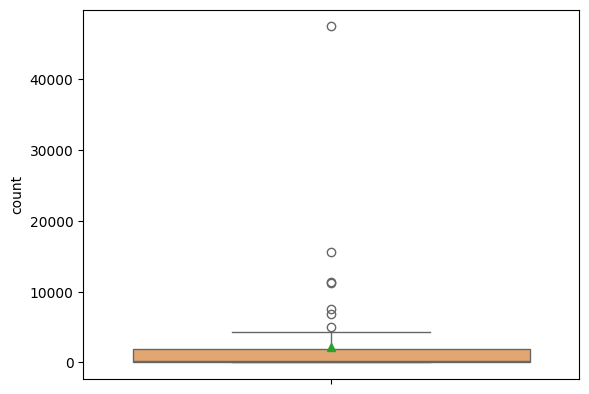

In [4]:
sns.boxplot(percentual_vendas_por_hora['count'], showmeans=True, color='sandybrown')
plt.savefig("../images/03_04_EDA_edible_mushroom_01_distribuicao.png")

In [5]:
percentual_vendas_por_hora.describe()

,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,count
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,6.022464,9.130435,8.822754,4.992609,3.655362,4.473623,7.694348,7.684203,11.949855,12.386377,8.203333,10.634348,4.323188,0.028406,2151.072464
std,6.031793,6.036617,6.847537,4.900100,4.526421,6.763589,7.690344,5.668266,12.866045,14.596144,7.095715,13.334849,7.241971,0.067074,6252.534901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.560000,4.210000,6.480000,0.000000,1.540000,1.590000,4.000000,4.880000,8.220000,8.360000,5.910000,4.550000,0.000000,0.000000,10.000000
50%,5.210000,10.090000,9.270000,5.240000,3.610000,3.990000,6.760000,8.330000,10.650000,10.000000,8.130000,7.840000,2.860000,0.000000,251.000000
75%,7.880000,13.080000,11.550000,6.200000,4.210000,4.990000,8.440000,10.240000,13.220000,12.260000,10.000000,12.890000,4.840000,0.020000,1824.000000
max,33.330000,25.000000,50.000000,33.330000,33.330000,50.000000,40.000000,33.330000,100.000000,100.000000,50.000000,100.000000,50.000000,0.400000,47509.000000


In [6]:
percentual_vendas_por_hora

,9h,10h,11h,12h,13h,14h,15h,16h,17h,18h,19h,20h,21h,22h,count
Item Name,,,,,,,,,,,,,,,
Agaricus Bisporus (Bag),20.00,0.00,10.00,0.00,10.00,0.00,0.00,10.00,30.00,20.00,0.00,0.00,0.00,0.00,10
Agaricus Bisporus (Box),7.44,11.89,9.83,4.70,4.11,4.68,6.10,8.10,9.74,9.03,9.59,10.47,4.18,0.14,4232
Apricot Bao Mushroom (1),7.07,14.50,11.59,6.13,4.42,4.05,6.40,9.68,10.91,11.07,8.13,5.22,0.83,0.00,7581
Apricot Bao Mushroom (2),5.04,9.14,6.48,4.46,4.01,3.99,6.04,7.58,8.73,9.80,10.09,16.83,7.70,0.10,5063
Apricot Bao Mushroom (250 G),10.00,20.00,0.00,0.00,0.00,0.00,20.00,0.00,10.00,30.00,10.00,0.00,0.00,0.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Xixia Black Mushroom (1),7.88,12.78,10.45,5.88,4.18,5.39,8.07,10.14,9.91,9.61,6.86,6.37,2.40,0.05,11407
Xixia Black Mushroom (2),2.27,15.91,6.82,0.00,2.27,0.00,0.00,18.18,13.64,13.64,9.09,11.36,6.82,0.00,44
Xixia Mushroom (1),7.88,13.72,11.03,5.73,4.09,4.90,7.59,9.92,10.67,9.96,6.62,5.91,1.97,0.03,47509


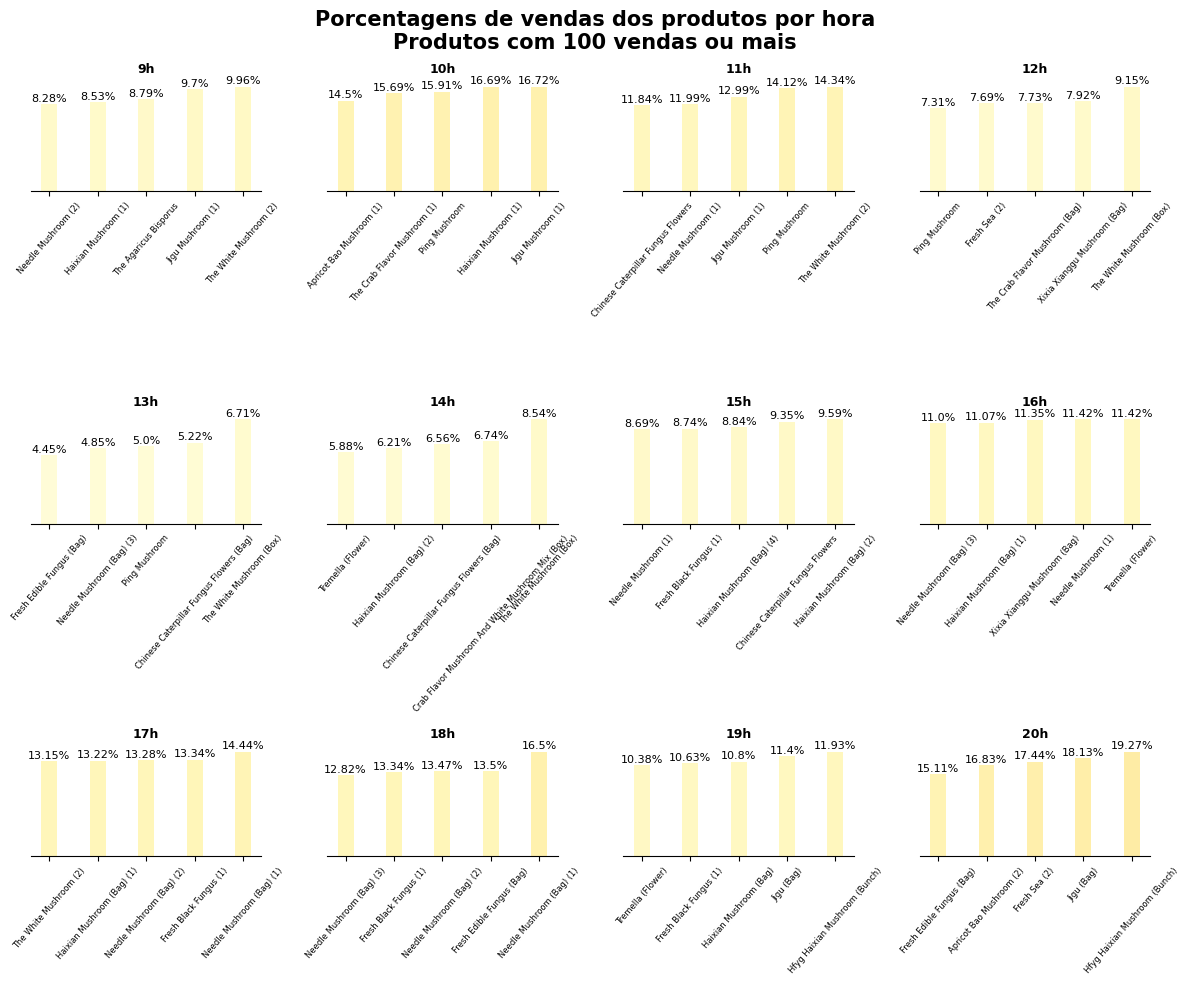

In [7]:
horas = ['9h','10h','11h','12h','13h','14h','15h','16h','17h','18h','19h','20h','21h']

fig,axs = plt.subplots(ncols=4,nrows=3,figsize=(12,10),tight_layout=True)

percentual_vendas_por_hora = percentual_vendas_por_hora.loc[percentual_vendas_por_hora['count'] >=100]

for hora,ax in zip(horas,axs.flat):
    
    b = percentual_vendas_por_hora[hora]
    a = b.sort_values(ascending=False).head(5).sort_values()
    norm = Normalize(vmin=0, vmax=100)
    cmap = plt.get_cmap('YlOrBr')  
    colors = cmap(norm(a.values))
    w = 0.33
    ax.bar(a.index, a.values, color=colors, width=w)
    ax.set_title(f'{hora}', fontweight='bold', fontsize=9)
    ax.spines[['top','left','right']].set_visible(False)
    ax.yaxis.set_visible(False)
    for i in range(0,len(a.index)):
        ax.annotate(f'{a.values[i]}%',(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
    ax.set_xticks(a.index)
    ax.set_xticklabels(labels=a.index, rotation=49, fontsize=6)
plt.suptitle("Porcentagens de vendas dos produtos por hora\nProdutos com 100 vendas ou mais", fontsize=15, fontweight='bold')
plt.savefig("../images/03_04_EDA_edible_mushroom_02_porcentagem_vendas_produtos.png")
plt.show()

### **3. Analisando as vendas, agrupadas pelo dia da semana**

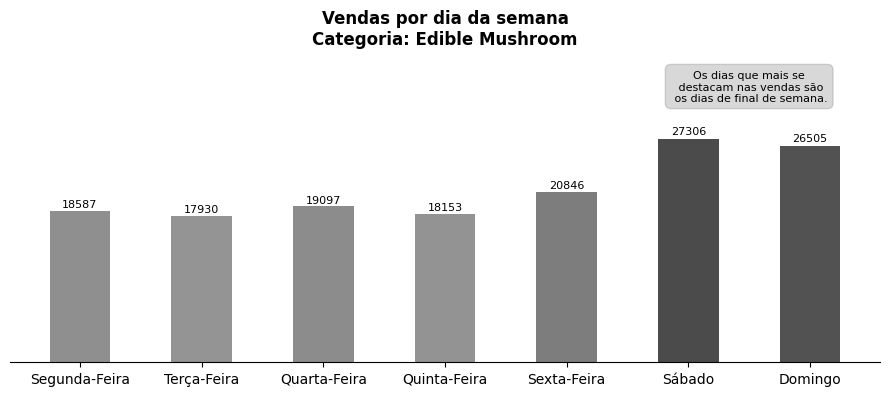

In [8]:
titulos = ['Segunda-Feira','Terça-Feira','Quarta-Feira','Quinta-Feira','Sexta-Feira','Sábado','Domingo']

a = base['Dia da semana'].value_counts().sort_index()
ind = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
a = a.reindex(ind)

fig, ax = plt.subplots(figsize=(9,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*1.3)
cmap = plt.get_cmap('Greys')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors, width=0.5)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(len(a.index)))
ax.set_xticklabels(titulos)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

ax.text(5.5, 32000, "Os dias que mais se\n destacam nas vendas são\n os dias de final de semana.", ha='center',fontsize=8,
        bbox=dict(facecolor='grey', edgecolor='grey', alpha=0.3, boxstyle='round,pad=0.5'))

plt.suptitle("Vendas por dia da semana\nCategoria: Edible Mushroom", fontweight='bold', fontsize=12)
plt.savefig("../images/03_04_EDA_edible_mushroom_03_vendas_dia_semana.png")
plt.show()

### **4. Visualizando os produtos mais vendidos dessa categoria**

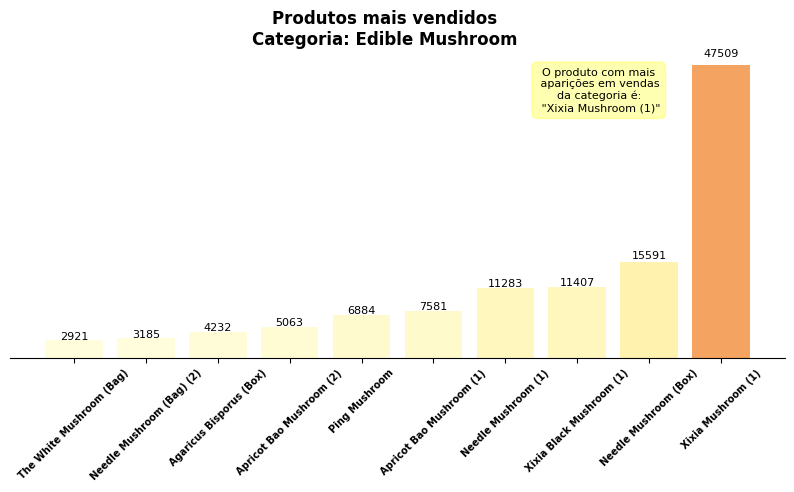

In [9]:
a = base['Item Name'].value_counts().sort_values(ascending=False).head(10).sort_values()

fig, ax = plt.subplots(figsize=(10,4))
norm = Normalize(vmin=0, vmax=a.values.max()*2)
cmap = plt.get_cmap('YlOrBr')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(len(a.index)))
ax.set_xticklabels(labels=a.index, rotation=45, fontsize=7, fontweight='bold')
ax.bar(a.index[-1],a.values[-1], color='sandybrown',alpha=1)

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)

ax.text(7.3, 40000, f'O produto com mais\n aparições em vendas\nda categoria é:\n "{a.index[-1]}"', ha='center',fontsize=8,
        bbox=dict(facecolor='yellow',edgecolor='yellow',alpha=0.3, boxstyle='round,pad=0.5'))
plt.suptitle("Produtos mais vendidos\nCategoria: Edible Mushroom", fontweight='bold', fontsize=12)
plt.savefig("../images/03_04_EDA_edible_mushroom_04_produtos_mais_vendidos.png")
plt.show()

### **5. Analisando o total arrecadado com as vendas**

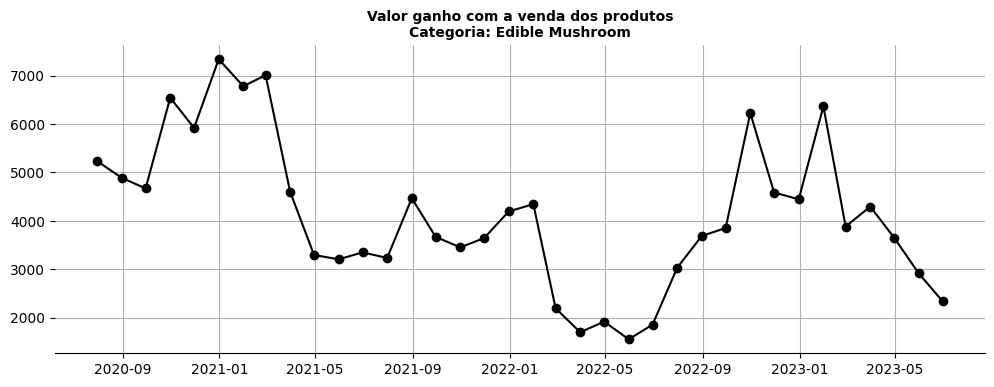

In [10]:
base_sale = base.loc[base['Sale or Return'] == 'sale']
base_datas = base_sale.set_index('Date')
base_datas = base_datas.resample('ME').count()
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(base_datas['Total'], marker='o', color='black')
ax.set_title("Valor ganho com a venda dos produtos\nCategoria: Edible Mushroom", fontsize=10, fontweight='bold')
ax.spines[['top','left','right']].set_visible(False)
ax.grid()
plt.savefig("../images/03_04_EDA_edible_mushroom_05_valor_ganho_vendas.png")
plt.show()

### **6. Analisando as vendas agrupadas pelos meses**

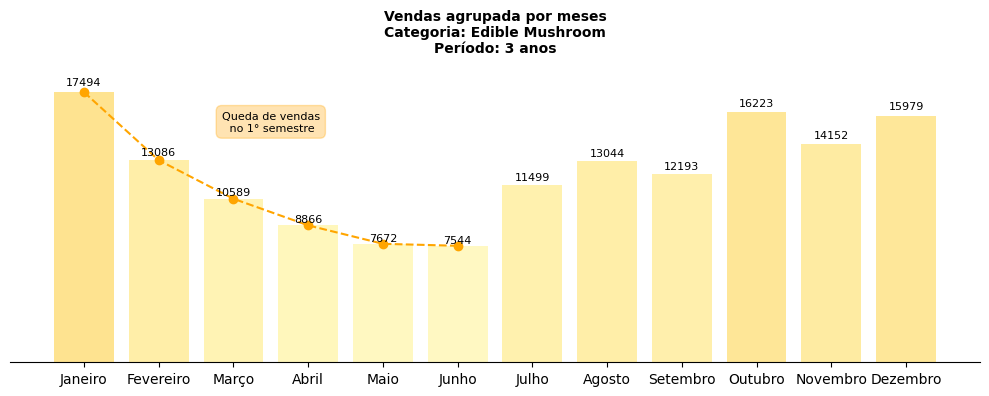

In [11]:
a = base_sale['Mês'].value_counts().sort_index()
meses = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

fig, ax = plt.subplots(figsize=(10,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*4)
cmap = plt.get_cmap('YlOrBr')
colors = cmap(norm(a.values))

ax.bar(a.index, a.values, color=colors)
ax.spines[['top','right','left']].set_visible(False)
ax.yaxis.set_visible(False)
ax.set_xticks(range(1,13))
ax.set_xticklabels(meses)
ax.plot(a.index[:6], a.values[:6], '--', color='orange', marker='o')

for i in range(0,len(a.index)):
        ax.annotate(a.values[i],(a.index[i],a.values[i]+a.values[i]*0.025),ha='center', fontsize=8)
ax.text(3.5, 15000, 'Queda de vendas\n no 1° semestre', ha='center',fontsize=8,
        bbox=dict(facecolor='orange',edgecolor='orange',alpha=0.3, boxstyle='round,pad=0.5'))

plt.suptitle("Vendas agrupada por meses\nCategoria: Edible Mushroom\nPeríodo: 3 anos", fontweight='bold', fontsize=10)
plt.savefig("../images/03_04_EDA_edible_mushroom_06_vendas_meses.png")
plt.show()

### **7. Analisando as vendas agrupadas pelo ano e mês**

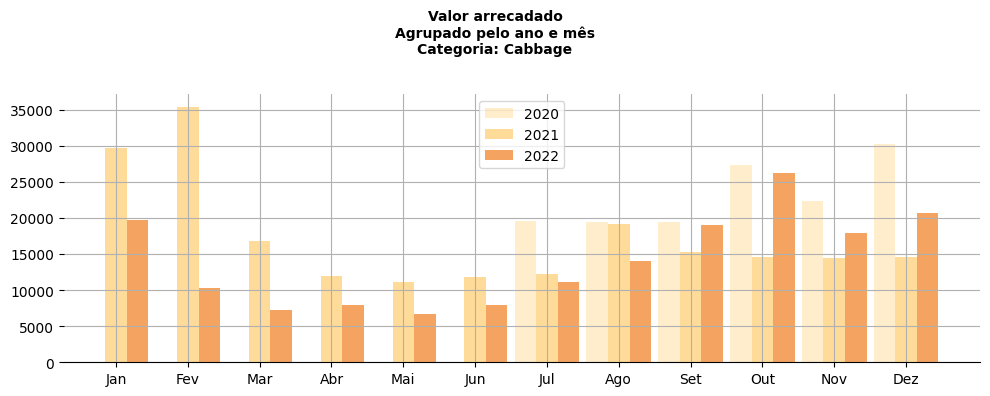

In [14]:
a = base_sale.groupby(["Ano","Mês"])['Total'].sum().reset_index()

meses = ['Jan','Fev','Mar','Abr','Mai','Jun','Jul','Ago','Set','Out','Nov','Dez']

vinte = a.loc[a.Ano == 2020]
vinteeum = a.loc[a.Ano == 2021]
vinteedois = a.loc[a.Ano == 2022]

fig, ax = plt.subplots(figsize=(10,4), tight_layout=True)
norm = Normalize(vmin=0, vmax=a.values.max()*2)
cmap = plt.get_cmap('Blues')
colors = cmap(norm(a.values))

w = 0.3
ax.grid()
ax.bar(vinte['Mês']-w, vinte['Total'], color="orange", width=w, label="2020", alpha=0.2)
ax.bar(vinteeum['Mês'], vinteeum['Total'], color="orange", width=w, label="2021", alpha=0.4)
ax.bar(vinteedois['Mês']+w, vinteedois['Total'], color="sandybrown", width=w, label="2022")
ax.spines[['top','right','left']].set_visible(False)
ax.legend()
ax.set_xticks(range(1,13))
ax.set_xticklabels(meses)

plt.suptitle("Valor arrecadado\nAgrupado pelo ano e mês\nCategoria: Cabbage\n", fontweight='bold', fontsize=10)
plt.savefig("../images/03_04_EDA_edible_mushroom_07_vendas_ano_mes.png")
plt.show()

### **8. Analisando os dois produtos com maiores taxas de perdas**

In [15]:
produtos_categoria = base['Item Name'].unique()

taxa_perdas = pd.read_csv("../data/annex4.csv")
taxa_perdas = taxa_perdas.loc[taxa_perdas['Item Name'].isin(produtos_categoria)]

In [16]:
taxa_perdas.sort_values(by='Loss Rate (%)', ascending=False).head(3)

,Item Code,Item Name,Loss Rate (%)
140,102900011030608,The Steak Mushrooms (Box),19.80
81,102900011008577,Hericium,16.19
241,106956146480203,The Crab Flavor Mushroom (2),16.04


#### **8.1 The Steak Mushrooms (Box)**

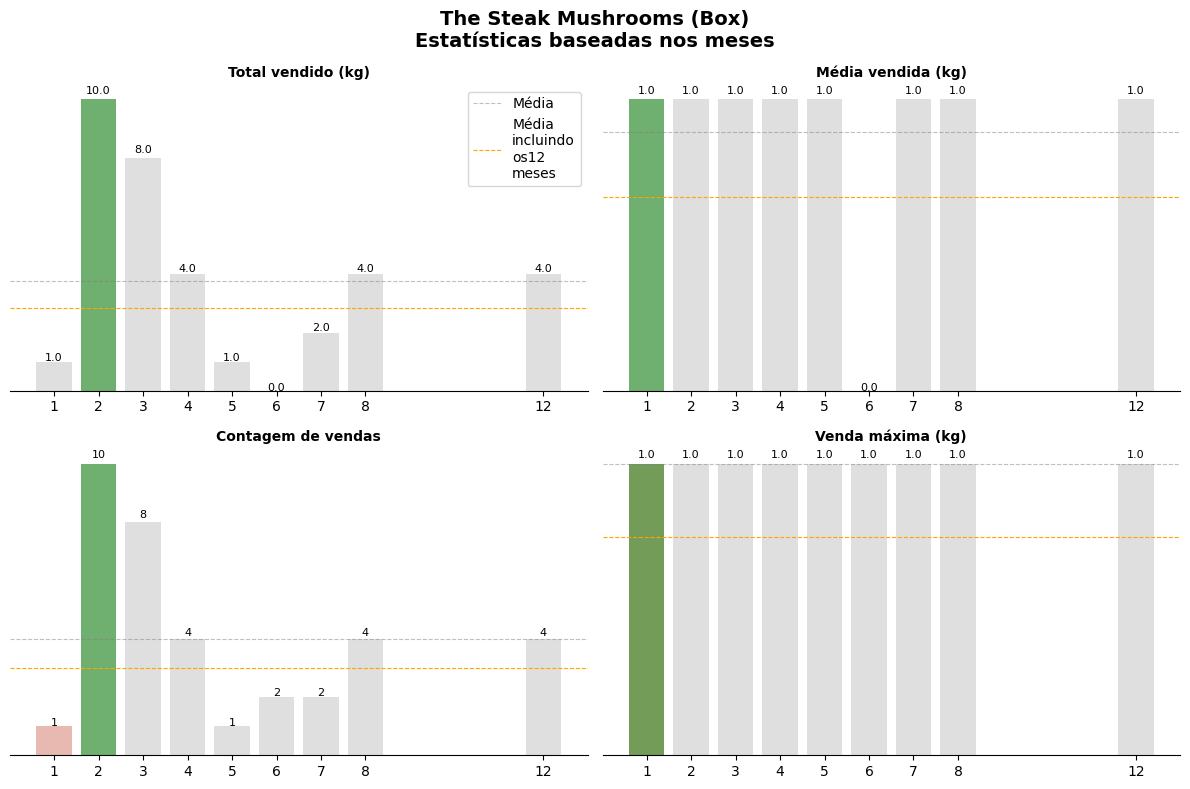

In [21]:
import sys 
sys.path.append("../functions/")
from funcoes import estatisticas_produto

estatisticas_produto(base, "The Steak Mushrooms (Box)", salvar=True,
                     salvar_como="03_04_EDA_edible_mushroom_08_thesteakmushroomsbox_1")

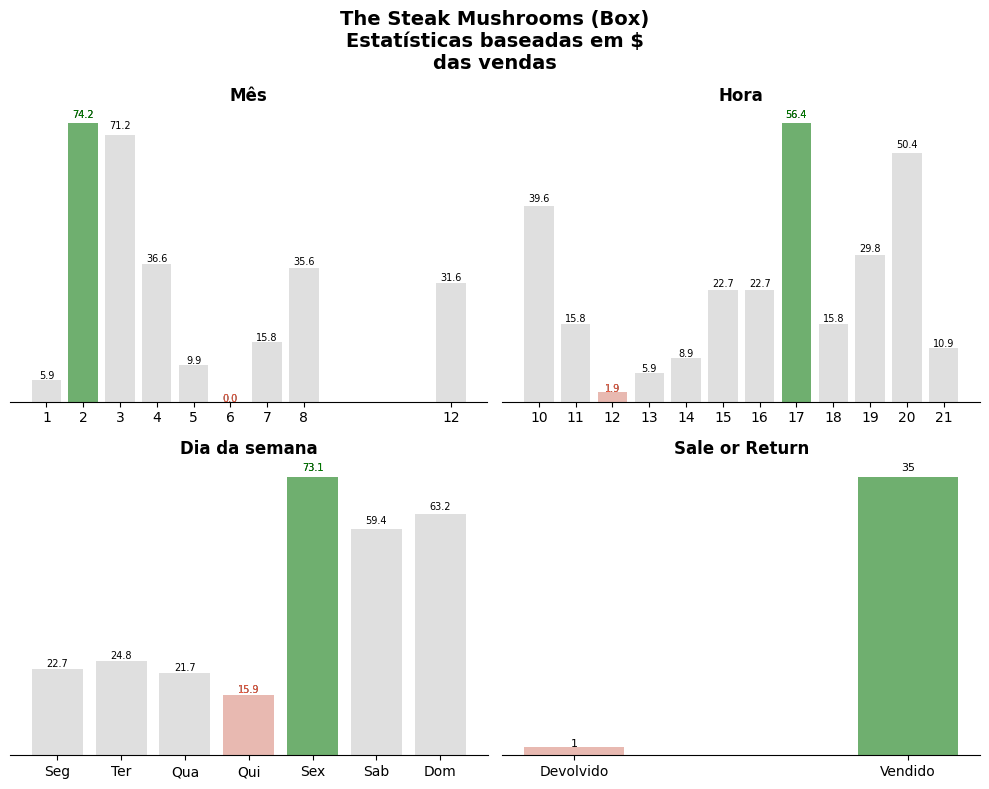

In [22]:
sys.path.append('../functions/')
from funcoes import estatisticas_produto_dois

estatisticas_produto_dois(base, "The Steak Mushrooms (Box)", salvar=True,
                     salvar_como="03_04_EDA_edible_mushroom_09_thesteakmushroomsbox_1_2")

#### **8.2. The Crab Flavor Mushroom (2)**

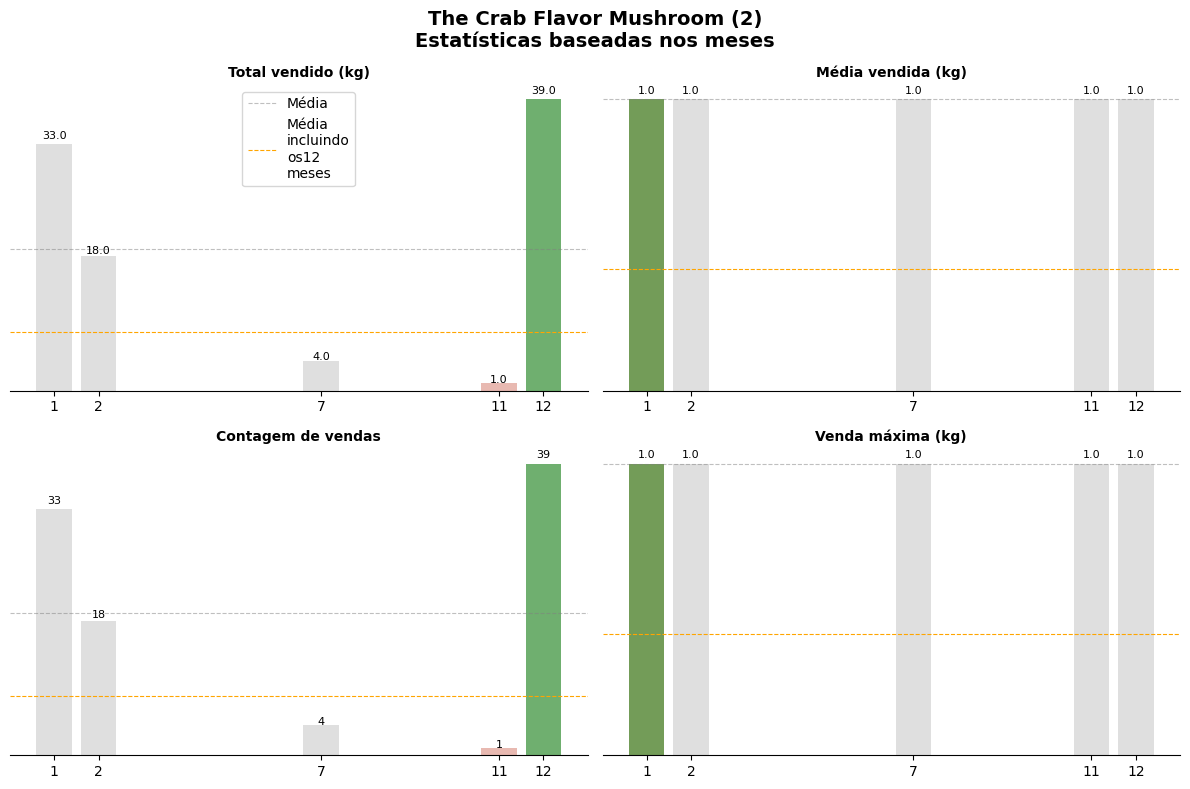

In [23]:
estatisticas_produto(base, "The Crab Flavor Mushroom (2)", salvar=True,
                     salvar_como="03_04_EDA_edible_mushroom_10_thecrabflavormushroom_2_1")

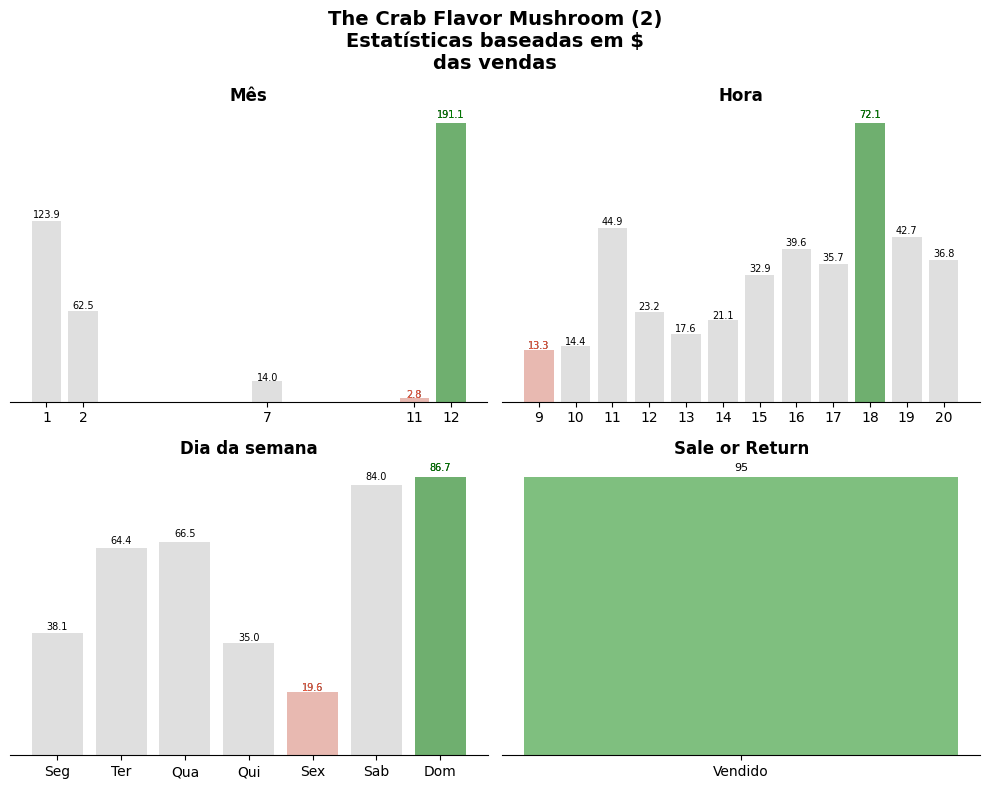

In [24]:
estatisticas_produto_dois(base, "The Crab Flavor Mushroom (2)", salvar=True,
                     salvar_como="03_04_EDA_edible_mushroom_11_thecrabflavormushroom_2_2")